# 1. Introduction
The Pima are a group of Native Americans living in Arizona. A genetic predisposition allowed this group to survive normally to a diet poor of carbohydrates for years. In the recent years, because of a sudden shift from traditional agricultural crops to processed foods, together with a decline in physical activity, made them develop the highest prevalence of type 2 diabetes and for this reason they have been subject of many studies.

### Dataset<br>
The dataset includes data from 768 women with 8 characteristics, in particular:
<br>
 1. Number of times pregnant
 2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
 3. Diastolic blood pressure (mm Hg)
 4. Triceps skin fold thickness (mm)
 5. 2-Hour serum insulin (mu U/ml)
 6. Body mass index (weight in kg/(height in m)^2)
 7. Diabetes pedigree function
 8. Age (years)<br>
The last column of the dataset indicates if the person has been diagnosed with diabetes (1) or not (0) 
### Source-
The original dataset is available at UCI Machine Learning Repository and can be downloaded from this address: http://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes

# 2. Problem Statement
The type of dataset and problem is a classic supervised binary classification. Given a number of elements all with certain characteristics (features), we want to build a machine learning model to identify people affected by type 2 diabetes.

To solve the problem we will have to analyse the data, do any required transformation and normalisation, apply a machine learning algorithm, train a model, check the performance of the trained model and iterate with other algorithms until we find the most performant for our type of dataset.

In [1]:
import numpy as np
import pandas as pd
import sklearn

# 3. Load ,Preprocess and Inspect dataset

In [2]:
data = pd.read_csv("/home/pankaj/projects/diabetes pima index/diabetes.csv")

In [3]:
data.values.shape

(768, 9)

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Data correlation matrix
The correlation matrix is an important tool to understand the correlation between the different characteristics. The values range from -1 to 1 and the closer a value is to 1 the bettere correlation there is between two characteristics.

In [5]:
corr = data.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


I'm not a doctor and I don't have any knowledge of medicine, but from the data I can guess that the greater the age or the BMI of a patient is, the greater probabilities are the patient can develop type 2 diabetes.

## Visualise the dataset
Visualising the data is an important step of the data analysis. With a graphical visualisation of the data we have a better understanding of the various features values distribution: for example we can understand what's the average age of the people or the average BMI etc...

We could of course limit our inspection to the table visualisation, but we could miss important things that may affect our model precision.

In [6]:
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20, 15))
plt.show()

An important thing I notice in the dataset (and that wasn't obvious at the beginning) is the fact that some people have null (zero) values for some of the features: it's not quite possible to have 0 as BMI or for the blood pressure.

# 4. Data cleaning and transformation
We have noticed from the previous analysis that some patients have missing data for some of the features. Machine learning algorithms don't work very well when the data is missing so we have to find a solution to "clean" the data we have.

The easiest option could be to eliminate all those patients with null/zero values, but in this way we would eliminate a lot of important data.

Another option is to calculate the median value for a specific column and substitute that value everywhere (in the same column) we have zero or null. Let's see how to apply this second method.

In [7]:
# Calculate the median value for BMI
median_bmi = data['BMI'].median()
# Substitute it in the BMI column of the
# dataset where values are 0
data['BMI'] = data['BMI'].replace(to_replace=0, value=median_bmi)

In [8]:
# Calculate the median value for BloodP
median_bloodp = data['BloodPressure'].median()
# Substitute it in the BloodP column of the
# dataset where values are 0
data['BloodPressure'] = data['BloodPressure'].replace(
    to_replace=0, value=median_bloodp)

In [9]:
# Calculate the median value for PlGlcConc
median_plglcconc = data['Glucose'].median()
# Substitute it in the PlGlcConc column of the
# dataset where values are 0
data['Glucose'] = data['Glucose'].replace(
    to_replace=0, value=median_plglcconc)

In [10]:
# Calculate the median value for SkinThick
median_skinthick = data['SkinThickness'].median()
# Substitute it in the SkinThick column of the
# dataset where values are 0
data['SkinThickness'] = data['SkinThickness'].replace(
    to_replace=0, value=median_skinthick)

In [11]:
# Calculate the median value for TwoHourSerIns
median_twohourserins = data['Insulin'].median()
# Substitute it in the TwoHourSerIns column of the
# dataset where values are 0
data['Insulin'] = data['Insulin'].replace(
    to_replace=0, value=median_twohourserins)

We haven't transformed all the columns, because for some values can make sense to be zero (like "Number of times pregnant").

## Data splitting

In [12]:
x=data.values
y=x[:,8]

In [13]:
x=x[:,:8]

In [14]:
print x.shape
print y.shape

(768, 8)
(768,)


In [15]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# 5. Select and train model
It's not possible to know in advance which algorithm will work better with our dataset. We need to compare a few and select the one with the "best score".
## Comparing multiple algorithms
To compare multiple algorithms with the same dataset, there is a very nice utility in sklearn called model_selection. We create a list of algorithms and then we score them using the same comparison method. At the end we pick the one with the best score.

In [16]:
# Import all the algorithms we want to test
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor


In [17]:
# Import the slearn utility to compare algorithms
from sklearn import cross_validation

In [18]:
# Prepare an array with all the algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))
models.append(('LSVC', LinearSVC()))
models.append(('RFC', RandomForestClassifier()))
models.append(('DTR', DecisionTreeRegressor()))

In [19]:
# Prepare the configuration to run the test
seed = 7
results = []
names = []
X = x_train
Y = y_train




In [20]:
# Every algorithm is tested and results are
# collected and printed
for name, model in models:
    kfold = cross_validation.KFold(X.shape[0], n_folds=10,shuffle=False)
    cv_results = cross_validation.cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (
        name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.758911 (0.034867)
KNN: 0.726415 (0.048770)
NB: 0.739450 (0.062140)
SVC: 0.653014 (0.050337)
LSVC: 0.587203 (0.144219)
RFC: 0.744183 (0.044644)
DTR: 0.711660 (0.040236)


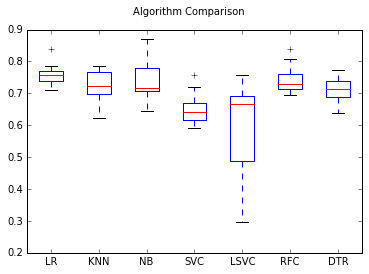

In [21]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

It looks like that using this comparison method, the most performant algorithm is SVC.

### Find the best parameters for SVC
The default parameters for an algorithm are rarely the best ones for our dataset. Using sklearn we can easily build a parameters grid and try all the possible combinations. At the end we inspect the best_estimator_ property and get the best ones for our dataset.

In [24]:
from sklearn.grid_search import GridSearchCV

param_grid = {
    'C': [1.0],
    'kernel': ['linear'],
    'shrinking': [True],
    'gamma': ['auto'],
    'coef0': [0.0]
}

model_svc = SVC()

grid = GridSearchCV(model_svc, param_grid, cv=10, scoring='accuracy')
grid.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ['linear'], 'C': [1.0], 'shrinking': [True], 'gamma': ['auto'], 'coef0': [0.0]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [25]:
grid.best_score_

0.76058631921824105

# 6. Increase The Accuracy Of Models Using Ensemble methods
It can take time to find well performing machine learning algorithms for your dataset. This is because of the trial and error nature of applied machine learning.

Once we have a shortlist of accurate models, we can use algorithm tuning to get the most from each algorithm.

Another approach that we can use to increase accuracy on your dataset is to combine the predictions of multiple different models together.

This is called an ensemble prediction.

Combine Model Predictions Into Ensemble Predictions
The three most popular methods for combining the predictions from different models are:

1. Bagging. Building multiple models (typically of the same type) from different subsamples of the training dataset.
2. Boosting. Building multiple models (typically of the same type) each of which learns to fix the prediction errors of a prior model in the chain.
3. Stacking. Building multiple models (typically of differing types) and supervisor model that learns how to best combine the predictions of the primary models.

# 7. Stacked Generalization Algorithm
Stacked Generalization or stacking is an ensemble algorithm where a new model is trained to combine the predictions from two or more models already trained or your dataset.

The predictions from the existing models or submodels are combined using a new model, and as such stacking is often referred to as blending, as the predictions from sub-models are blended together.

It is typical to use a simple linear method to combine the predictions for submodels such as simple averaging or voting, to a weighted sum using linear regression or logistic regression.

Models that have their predictions combined must have skill on the problem, but do not need to be the best possible models. This means that you do not need to tune the submodels intently, as long as the model shows some advantage over a baseline prediction.

It is important that sub-models produce different predictions, so-called uncorrelated predictions. Stacking works best when the predictions that are combined are all skillful, but skillful in different ways. This may be achieved by using algorithms that use very different internal representations (trees compared to instances) and/or models trained on different representations or projections of the training data.

## Stacking model
We are going to use two models as submodels for stacking and a logistic regression model as the aggregator model.

This part is divided into 3 sections:

1. Sub-model #1: SVM.
2. Sub-model #2: Random Forest.
3. Aggregator Model: Logistic Regression.


## Sub-model #1: SVM Classifier

In [26]:
from sklearn import svm
clf=svm.SVC();
clf.fit(x_train,y_train)
pred1=clf.predict(x_train)
y_pred1=clf.predict(x_test)
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test, y_pred1)
print acc

0.642857142857


## Sub-model #2: Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
clf3=RandomForestClassifier()
clf3.fit(x_train,y_train)
pred3=clf.predict(x_train)
y_pred3=clf3.predict(x_test)
acc=accuracy_score(y_test,y_pred3)
print acc

0.753246753247


## Aggregator Model: Logistic Regression

In [28]:
pred=np.column_stack((pred1,pred3))
y_pred=np.column_stack((y_pred1,y_pred3))
from sklearn.linear_model import LogisticRegression
clf2=LogisticRegression()
clf2.fit(pred,y_train)
y_pred2=clf2.predict(y_pred)
acc=accuracy_score(y_test,y_pred2)
print acc

0.753246753247


# Extensions
This section lists extensions to this tutorial that we can explore.

- <b>Tune Algorithms</b>. The algorithms used for the submodels and the aggregate model in this tutorial can be further tuned.We can explore ore alternate configurations and see if it lifts performance.
- <b>Prediction Correlations</b>. Stacking works better if the predictions of submodels are weakly correlated. Implementing calculations to estimate the correlation between the predictions of submodels increases efficiency.
- <b>Different Sub-models</b>. We can also implement more and different sub-models to be combined using the stacking procedure.
- <b>Different Aggregating Model</b>.We can also experiment with simpler models (like averaging and voting) and more complex aggregation models .
- <b>More Datasets</b>. 